In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt


Welcome to JupyROOT 6.20/04


In [2]:


def file_np(file):
    event = [ file["Delphes;1"]["Electron"].array(),
              file["Delphes;1"]["Electron.PT"].array(),
              file["Delphes;1"]["Electron.Eta"].array(),
              file["Delphes;1"]["Electron.Phi"].array(),
              file["Delphes;1"]["Muon"].array(),                #4
              file["Delphes;1"]["Muon.PT"].array(),
              file["Delphes;1"]["Muon.Eta"].array(),
              file["Delphes;1"]["Muon.Phi"].array(),
              file["Delphes;1"]["Photon"].array(),              #8
              file["Delphes;1"]["Photon.PT"].array(),
              file["Delphes;1"]["Photon.Eta"].array(),
              file["Delphes;1"]["Photon.Phi"].array(),
              file["Delphes;1"]["MissingET"].array(),           #12
              file["Delphes;1"]["MissingET.fUniqueID"].array(),   
              file["Delphes;1"]["MissingET.fBits"].array(),
              file["Delphes;1"]["MissingET.MET"].array(),
              file["Delphes;1"]["MissingET.Eta"].array(),
              file["Delphes;1"]["MissingET.Phi"].array(),
              file["Delphes;1"]["Jet"].array(),                 #18
              file["Delphes;1"]["Jet.EhadOverEem"].array(),     
              file["Delphes;1"]["Jet.Mass"].array(),
              file["Delphes;1"]["Event.Number"].array(),
              file["Delphes;1"]["Jet.Tau[5]"].array()
              ]
    
    event = np.expand_dims(event, axis=-1)    ### reshape data
    event = event.transpose((1,0,2))
    event = np.squeeze(event,axis=(2,))
    return event 
################################################
me = 0.000511
mu = 0.10566

################################################


def prlen(events):
    print(len(events))
    
###############################################  simple sel (any=? l=1 j>1)

def num_sl(event,lab,num):
    where1 = np.where(event[:,lab]==num)
    return event[where1]

def l_sl(event):
    where1 = np.where(event[:,0]+event[:,4]==1)
    return event[where1]

def j_sl(event):
    where1 = np.where(event[:,18]>0)
    return(event[where1])  

def Ehover(event,sl_jet):
    where=[]
    for i in range(len(event)):
        if np.min(event[i][19])<0.2:
            where.append(i)
            sl_jet.append(np.min(event[i][19]))
    return event[where]   
        
################################################  maa caculate
def m_aa(events, m, pt1):
    where1=[]   
    for i in range(len(events)):
        p = [0,0,0,0] 
        for j in range(events[i][8]):
            pt = events[i][9][j]   
            eta = events[i][10][j]  
            phi = events[i][11][j]    
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
            p[3] = p[3] + pt*np.sinh(eta)   ### pz
            p[0] = p[0] + np.sqrt( (pt*np.cos(phi))**2 + (pt*np.sin(phi))**2 + (pt*np.sinh(eta))**2 )     
        maa = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(maa)
        pTaa = np.sqrt(p[1]**2 + p[2]**2)
        pt1.append(pTaa)
        if 90<maa<110:
            where1.append(i)
    return events[where1]
################################################   pt sl    
def pt_sl(events):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]    
        for j in range(events[i][8]):
            pt = events[i][9][j]    
            eta = events[i][10][j]    
            phi = events[i][11][j]   
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
        pTaa = np.sqrt(p[1]**2 + p[2]**2)    
        if pTaa>50:
              where1.append(i)
    return events[where1]
################################################ mlv caculate
def mvl_sl(events,m):
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(mlv)
################################################## must 1l events
def MTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        
        m.append(mlv)
        pt.append(ptlv)
        if mlv > 58:
            where1.append(i)
    return(events[where1])
##################################################   
def PTvl_sl(events):
    where1=[]
    m=[]
    pt=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        m.append(mlv)
        pt.append(ptlv)
        if ptlv > 50:
            where1.append(i)
    return(events[where1])
#######################################################################################

def j_mass(events,j_mass):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            jet_m = events[i][20][where1[0][j]]
            j_mass.append(jet_m)
            where.append(i)  
    c = np.unique(where)
    return events[c]


##################################################
def j_mass_sl(events,j_mass):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            jet_m = events[i][20][where1[0][j]]
            if max_d<jet_m<max_u:
                j_mass.append(jet_m)
                where.append(i)  
    if not where:
        c = []
    else:
        c = np.unique(where)
    return events[c]
#######################################################################################
def draw_tau2overtau1(events,tau2overtau1):
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            tau1 = events[i][22][where1[0][j]][0]
            tau2 = events[i][22][where1[0][j]][1]
            if tau1 != 0 :
                tau2overtau1.append(tau2/tau1)
                
def tau2overtau1_sl(events):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            tau1 = events[i][22][where1[0][j]][0]
            tau2 = events[i][22][where1[0][j]][1]
            if tau1 != 0 :
                if tau2/tau1<0.05:
                    where.append(i)
    return events[where]
                               
########################################################################################
def significance(s,b):   ### t = (sigma b)^2
    t = (b*0.1)**2
    g = 2*((s+b)*np.log((s+b)*(b+t)/(b**2+(s+b)*t))-((b**2)/t)*np.log(1+(t*s/(b*(b+t)))))
    return np.sqrt(g)

def signif_short(s,b):
    return np.sqrt(2*((s+b)*np.log(1+s/b)-s))

###########################################
def z_2(f, left, right, epsilon=1e-12):
    if left >= right:
        return None

    while abs(right - left) > epsilon:
        mid = (left + right) / 2
        f_mid = f(mid,b)-2
        if f_mid == 0:
            return mid
        elif f_mid < 0:
            left = mid
        elif f_mid > 0:
            right = mid

    return (left + right) / 2

In [3]:

m_axlist = [1, 5, 10, 20, 25]
x_seclist = [15990, 15250, 14060, 11850, 10890]

fa_limt_300 = []
fa_limt_3000 = []
gaww_limt_300 = []
gaww_limt_3000 = []

s_fa_limt_300 = []
s_fa_limt_3000 = []
s_gaww_limt_300 = []
s_gaww_limt_3000 = []

######################################## s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]             
s_list_300 = []     
s_list_3000 = []
b1_list_300 = []
b1_list_3000 = []
b2_list_300 = []
b2_list_3000 = []
b_list_300 = []
b_list_3000 = []
              


bg_file = uproot.open("/data/event/final/bg_ppaalvll/Events/run_01/tag_1_delphes_events.root")
bg_jet_file = uproot.open("/data/event/final/bgjet_pplvllj/Events/run_01/tag_1_delphes_events.root")
bg_events = file_np(bg_file)
j_events = file_np(bg_jet_file)

for i in range(len(m_axlist)):
    sg_file = uproot.open(f"/data/event/final/sg_{m_axlist[i]}ppwax/Events/run_01/tag_1_delphes_events.root") 
    m_ax = m_axlist[i]
    bg_Xsection = 94.37
    j_Xsection = 5887000
    sg_Xsection = x_seclist[i]   #fb = pb*1000

    sg_events = file_np(sg_file)

    # sg_X  1(15990) 5(15250) 10(14060) 15(12870) 20(11850)  25(10890)
    # bg_x  94.37
    # j_x   5887000
    ###########################################################
    max_shift = m_ax*0.1
    if m_ax == 1:
        max_u = 2
        max_d = 0.5
    else:
        max_u = m_ax + 2*max_shift
        max_d = m_ax - max_shift    
    ###########################################################
    jEho_sg_1j_Eho=[]
    jEho_bg_1j_Eho=[]
    jEho_j_1j_Eho=[]


    ############################# MT PT
    MTv_sgsl_1j_Eho_1l_PT = []
    MTv_bgsl_1j_Eho_1l_PT = []
    MTv_jsl_1j_Eho_1l_PT = []

    PTv_sgsl_1j_Eho_1l_PT = []
    PTv_bgsl_1j_Eho_1l_PT = []
    PTv_jsl_1j_Eho_1l_PT = []

    ###################################################sl: 1j -> Eho<0.2 -> 1l
    sgsl_1j = j_sl(sg_events)
    sgsl_1j_Eho = Ehover(sgsl_1j,jEho_sg_1j_Eho)
    sgsl_1j_Eho_1l = l_sl(sgsl_1j_Eho)

    bgsl_1j = j_sl(bg_events)
    bgsl_1j_Eho = Ehover(bgsl_1j,jEho_bg_1j_Eho)
    bgsl_1j_Eho_1l = l_sl(bgsl_1j_Eho)

    jsl_1j = j_sl(j_events)
    jsl_1j_Eho = Ehover(jsl_1j,jEho_j_1j_Eho)
    jsl_1j_Eho_1l = l_sl(jsl_1j_Eho)
    ####################################################sl: 8<jmass<15  ***************************************************************

    sgsl_1j_Eho_1l_PT = PTvl_sl(sgsl_1j_Eho_1l)
    bgsl_1j_Eho_1l_PT = PTvl_sl(bgsl_1j_Eho_1l)
    jsl_1j_Eho_1l_PT = PTvl_sl(jsl_1j_Eho_1l)

    sgsl_1j_Eho_1l_PT_MT = MTvl_sl(sgsl_1j_Eho_1l_PT,MTv_sgsl_1j_Eho_1l_PT,PTv_sgsl_1j_Eho_1l_PT)
    bgsl_1j_Eho_1l_PT_MT = MTvl_sl(bgsl_1j_Eho_1l_PT,MTv_bgsl_1j_Eho_1l_PT,PTv_bgsl_1j_Eho_1l_PT)
    jsl_1j_Eho_1l_PT_MT = MTvl_sl(jsl_1j_Eho_1l_PT,MTv_jsl_1j_Eho_1l_PT,PTv_jsl_1j_Eho_1l_PT)
    ####################################################

    sgsl_1j_Eho_1l_PT_MT_t21 = tau2overtau1_sl(sgsl_1j_Eho_1l_PT_MT)
    bgsl_1j_Eho_1l_PT_MT_t21 = tau2overtau1_sl(bgsl_1j_Eho_1l_PT_MT)
    jsl_1j_Eho_1l_PT_MT_t21 = tau2overtau1_sl(jsl_1j_Eho_1l_PT_MT)

    ####################################################

    jmass_sgsl_1j_Eho_1l_PT_MT_t21=[]
    jmass_sgsl_1j_Eho_1l_PT_MT_t21=[]
    jmass_jsl_1j_Eho_1l_PT_MT_t21=[]

    sgsl_1j_Eho_1l_PT_MT_t21_jm = j_mass_sl(sgsl_1j_Eho_1l_PT_MT_t21,jmass_sgsl_1j_Eho_1l_PT_MT_t21)
    bgsl_1j_Eho_1l_PT_MT_t21_jm = j_mass_sl(bgsl_1j_Eho_1l_PT_MT_t21,jmass_sgsl_1j_Eho_1l_PT_MT_t21)
    jsl_1j_Eho_1l_PT_MT_t21_jm = j_mass_sl(jsl_1j_Eho_1l_PT_MT_t21,jmass_jsl_1j_Eho_1l_PT_MT_t21)
    ####################################################
    sgsl_event = len(sgsl_1j_Eho_1l_PT_MT_t21_jm)
    bgsl_event = len(bgsl_1j_Eho_1l_PT_MT_t21_jm)
    jsl_event = len(jsl_1j_Eho_1l_PT_MT_t21_jm)

    bgNsl_event = len(bg_events)
    sgNsl_event = len(sg_events)
    jNsl_event = len(j_events)

    C_W = 2
    C_B = 1
    fa = 1000
    sin_w_2 = 0.22290
    cos_w_2 = 1 - sin_w_2

    Lum = [300,3000]
    print('M_ax=',m_axlist[i])
    print('\033[0;33msg sl :\033[0m',len(sgsl_1j_Eho_1l_PT_MT_t21_jm))
    print('\033[0;34mbg sl :\033[0m',len(bgsl_1j_Eho_1l_PT_MT_t21_jm))
    print('\033[0;35mbg sl :\033[0m',len(jsl_1j_Eho_1l_PT_MT_t21_jm))

####################################################################################   long z
    for k in range(len(Lum)):

        s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]
        b1 = bg_Xsection*(bgsl_event/bgNsl_event)*Lum[k]
        b2 = j_Xsection*(jsl_event/jNsl_event)*Lum[k]
        b = b1 + b2
#########################################################        
        if k == 0:
            print('\033[0;33ms_300 :\033[0m',s)
            print('\033[0;34mb_300 :\033[0m',b)
            s_list_300.append(s)
            b1_list_300.append(b1)
            b2_list_300.append(b2)
            b_list_300.append(b)
        elif k == 1:       
            print('\033[0;33ms_3000 :\033[0m',s)
            print('\033[0;34mb_3000 :\033[0m',b)
            s_list_3000.append(s)
            b1_list_3000.append(b1)
            b2_list_3000.append(b2)    
            b_list_3000.append(b)
#########################################################        
        if b == 0  :                                             ###################   if jet_bg and bg are zero
            exp_s = 3
            exp_sg_Xsection = (exp_s*sg_Xsection/s)
            print('\033[0;34mLuminosity:',Lum[k],'\033[0m')
#             print('sg_Xsection:',sg_Xsection)
#             print('z:nan')
#             print('exp_z:nan')
            print('exp_s:',exp_s)
#             print('exp_sg_Xsection:',exp_sg_Xsection)

            fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
            gaww_limt = (4*C_W)/fa_limit
            
            if k == 0:
                fa_limt_300.append(fa_limit)
                gaww_limt_300.append(gaww_limt)
            elif k == 1:
                fa_limt_3000.append(fa_limit)
                gaww_limt_3000.append(gaww_limt)
            print('fa_limit',fa_limit)
            print('gaww_limt',gaww_limt)
    
        else:
            i = 0
            while True:
                if significance(i, b) - 2 > 0:
                    max_n = i
#                     print('near z:', significance(i, b), 'i:', i)
                    break
                i += 1

            max_n = max_n        
            min_n = max_n-1

            exp_s = z_2(significance, min_n, max_n,epsilon=1e-5)   #-5   /  -12
            if exp_s<3:
                exp_s = 3
            exp_sg_Xsection = (exp_s*sg_Xsection/s)

            print('\033[0;34mLuminosity:',Lum[k],'\033[0m')
#             print('sg_Xsection:',sg_Xsection)
#             print('z:',significance(s,b))
#             print('exp_z:',significance(exp_s,b))
            print('exp_s:',exp_s)
#             print('exp_sg_Xsection:',exp_sg_Xsection)

            fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
            gaww_limt = (4*C_W)/fa_limit
        
            if k == 0:
                fa_limt_300.append(fa_limit)
                gaww_limt_300.append(gaww_limt)
            elif k == 1:
                fa_limt_3000.append(fa_limit)
                gaww_limt_3000.append(gaww_limt)
            print('fa_limit',fa_limit)
            print('gaww_limt',gaww_limt)
    print('**************************************')
####################################################################################  short z
    for k in range(len(Lum)):
        s=0
        b1=0
        b2=0
        b3=0
        
        s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]
        b1 = bg_Xsection*(bgsl_event/bgNsl_event)*Lum[k]
        b2 = j_Xsection*(jsl_event/jNsl_event)*Lum[k]
        b = b1 + b2

        if b == 0  :                                             ###################  if jet_bg and bg are zero
            exp_s = 3
            exp_sg_Xsection = (exp_s*sg_Xsection/s)
            print('\033[0;34mshort_sign-Luminosity:',Lum[k],'\033[0m')
#             print('sg_Xsection:',sg_Xsection)
#             print('z:nan')
#             print('exp_z:nan')
            print('exp_s:',exp_s)
#             print('exp_sg_Xsection:',exp_sg_Xsection)

            fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
            gaww_limt = (4*C_W)/fa_limit
            
            if k == 0:
                s_fa_limt_300.append(fa_limit)
                s_gaww_limt_300.append(gaww_limt)
            elif k == 1:
                s_fa_limt_3000.append(fa_limit)
                s_gaww_limt_3000.append(gaww_limt)
            print('fa_limit',fa_limit)
            print('gaww_limt',gaww_limt)
    
        else:
            i = 0
            while True:
                if signif_short(i, b) - 2 > 0:
                    max_n = i
#                     print('near z:', significance(i, b), 'i:', i)
                    break
                i += 1

            max_n = max_n        
            min_n = max_n-1

            exp_s = z_2(signif_short, min_n, max_n,epsilon=1e-5)   #-5   /  -12
            exp_sg_Xsection = (exp_s*sg_Xsection/s)
            if exp_s<3:
                exp_s = 3

            print('\033[0;34mshort_sign-Luminosity:',Lum[k],'\033[0m')
#             print('sg_Xsection:',sg_Xsection)
#             print('z:',significance(s,b))
#             print('exp_z:',significance(exp_s,b))
            print('exp_s:',exp_s)
#             print('exp_sg_Xsection:',exp_sg_Xsection)

            fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
            gaww_limt = (4*C_W)/fa_limit
        
            if k == 0:
                s_fa_limt_300.append(fa_limit)
                s_gaww_limt_300.append(gaww_limt)
            elif k == 1:
                s_fa_limt_3000.append(fa_limit)
                s_gaww_limt_3000.append(gaww_limt)
            print('fa_limit',fa_limit)
            print('gaww_limt',gaww_limt)
    print('********************************************************************')





M_ax= 1
sg sl : 601
bg sl : 89
bg sl : 8
s_300 : 288299.7
b_300 : 141313.19679
Luminosity: 300 
exp_s: 30188.067501068115
fa_limit 3090.3270193318835
gaww_limt 0.0025887227953401413
s_3000 : 2882997.0
b_3000 : 1413131.9679
Luminosity: 3000 
exp_s: 301784.59521865845
fa_limit 3090.8189171178624
gaww_limt 0.0025883108051699996
**************************************
short_sign-Luminosity: 300 
exp_s: 752.499324798584
fa_limit 19573.524687304605
gaww_limt 0.00040871535034202615
short_sign-Luminosity: 3000 
exp_s: 2378.1711235046387
fa_limit 34817.73732353346
gaww_limt 0.00022976794631030678
********************************************************************
M_ax= 5
sg sl : 821
bg sl : 10
bg sl : 0
s_300 : 375607.5
b_300 : 2.8311
Luminosity: 300 
exp_s: 4.070606231689453
fa_limit 303764.894020594
gaww_limt 2.6336157197472704e-05
s_3000 : 3756075.0000000005
b_3000 : 28.311000000000003
Luminosity: 3000 
exp_s: 13.09512710571289
fa_limit 535565.1001515079
gaww_limt 1.4937493122193459e-05
****

/tmp/ipykernel_2058/2667804828.py:187: RuntimeWarning: invalid value encountered in sqrt
  mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
/tmp/ipykernel_2058/2667804828.py:146: RuntimeWarning: invalid value encountered in sqrt
  mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )


M_ax= 25
sg sl : 682
bg sl : 0
bg sl : 0
s_300 : 222809.4
b_300 : 0.0
Luminosity: 300 
exp_s: 3
fa_limit 272524.861251226
gaww_limt 2.935511998160502e-05
s_3000 : 2228094.0
b_3000 : 0.0
Luminosity: 3000 
exp_s: 3
fa_limit 861799.2805752393
gaww_limt 9.282904012939194e-06
**************************************
short_sign-Luminosity: 300 
exp_s: 3
fa_limit 272524.861251226
gaww_limt 2.935511998160502e-05
short_sign-Luminosity: 3000 
exp_s: 3
fa_limit 861799.2805752393
gaww_limt 9.282904012939194e-06
********************************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

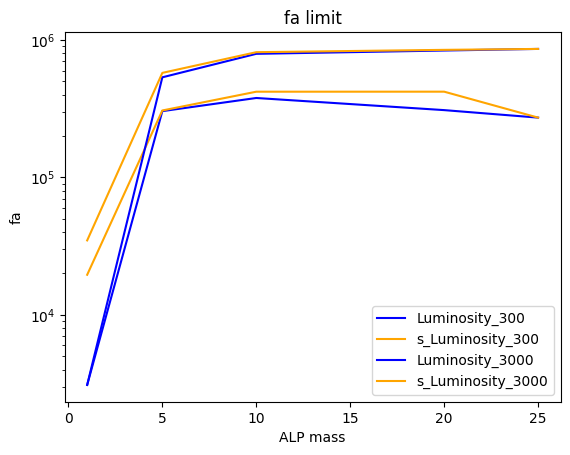

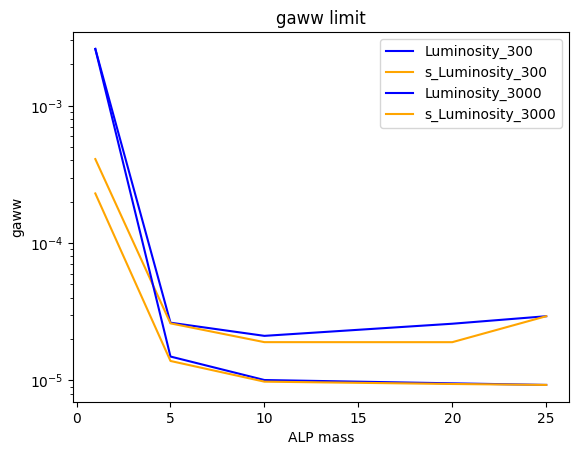

In [4]:
plt.figure(1)
plt.plot(m_axlist,fa_limt_300,label='Luminosity_300',color = 'blue')
plt.plot(m_axlist,s_fa_limt_300,label='s_Luminosity_300',color = 'orange')
plt.plot(m_axlist,fa_limt_3000,label='Luminosity_3000',color = 'blue')
plt.plot(m_axlist,s_fa_limt_3000,label='s_Luminosity_3000',color = 'orange')
plt.title('fa limit')
plt.xlabel('ALP mass')
plt.ylabel('fa')
plt.yscale("log")
plt.legend(loc='best')
plt.show



plt.figure(2)
plt.plot(m_axlist,gaww_limt_300,label='Luminosity_300',color = 'blue')
plt.plot(m_axlist,s_gaww_limt_300,label='s_Luminosity_300',color = 'orange')
plt.plot(m_axlist,gaww_limt_3000,label='Luminosity_3000',color = 'blue')
plt.plot(m_axlist,s_gaww_limt_3000,label='s_Luminosity_3000',color = 'orange')
plt.title('gaww limit')
plt.xlabel('ALP mass')
plt.ylabel('gaww')
plt.yscale("log")
plt.legend(loc='best')
plt.show



In [5]:

##################################################### "d" mean small mass  "s" mean short z      copy result to bigmass_z
fa_limt_300.reverse()
fa_limt_3000.reverse()
s_fa_limt_300.reverse()
s_fa_limt_3000.reverse()

gaww_limt_300.reverse()
gaww_limt_3000.reverse()
s_gaww_limt_300.reverse()
s_gaww_limt_3000.reverse()
m_axlist.reverse()
x_seclist.reverse()

s_list_300.reverse()
s_list_3000.reverse()
b1_list_300.reverse()
b1_list_3000.reverse()
b2_list_300.reverse()
b2_list_3000.reverse()
b_list_300.reverse()
b_list_3000.reverse()

#print('\033[0;34mfa\033[0m')
print('d_fa_limt_300 =',fa_limt_300)
print('d_fa_limt_3000 =',fa_limt_3000)
#print('\033[0;34ms_fa\033[0m')
print('d_s_fa_limt_300 =',s_fa_limt_300)
print('d_s_fa_limt_3000 =',s_fa_limt_3000)
#print('\033[0;34mgaww\033[0m')
print('d_gaww_limt_300 =',gaww_limt_300)
print('d_gaww_limt_3000 =',gaww_limt_3000)
#print('\033[0;34ms_gaww\033[0m')
print('d_s_gaww_limt_300 =',s_gaww_limt_300)
print('d_s_gaww_limt_3000 =',s_gaww_limt_3000)
print('d_m_axlist =',m_axlist)
print('d_x_seclist =',x_seclist)

print('')
print('d_s_list_300 =',s_list_300)
print('d_s_list_3000 =',s_list_3000)
print('d_b1_list_300 =',b1_list_300)
print('d_b1_list_3000 =',b1_list_3000)
print('d_b2_list_300 =',b2_list_300)
print('d_b2_list_3000 =',b2_list_3000)
print('d_b_list_300 =',b_list_300)
print('d_b_list_3000 =',b_list_3000)


d_fa_limt_300 = [272524.861251226, 309048.5398768291, 378697.7686757607, 303764.894020594, 3090.3270193318835]
d_fa_limt_3000 = [861799.2805752393, 838991.9171851488, 793853.962452253, 535565.1001515079, 3090.8189171178624]
d_s_fa_limt_300 = [272524.861251226, 420985.4374797337, 420788.15337167506, 307176.0308880635, 19573.524687304605]
d_s_fa_limt_3000 = [861799.2805752393, 848413.4017495407, 815909.799753317, 576812.4074177183, 34817.73732353346]
d_gaww_limt_300 = [2.935511998160502e-05, 2.588590129947998e-05, 2.1125025447006432e-05, 2.6336157197472704e-05, 0.0025887227953401413]
d_gaww_limt_3000 = [9.282904012939194e-06, 9.535252767202237e-06, 1.0077420254082522e-05, 1.4937493122193459e-05, 0.0025883108051699996]
d_s_gaww_limt_300 = [2.935511998160502e-05, 1.9003032617690298e-05, 1.901194208035067e-05, 2.604369871201064e-05, 0.00040871535034202615]
d_s_gaww_limt_3000 = [9.282904012939194e-06, 9.429365429050203e-06, 9.805005409199312e-06, 1.3869327180069703e-05, 0.0002297679463103067

In [6]:
s1 = []
Xsection_w = [4584, 5583, 6640, 7858, 8969, 10220, 10890, 11850, 14060, 15250, 15990]
for i in range(len(Xsection_w)):
    a = Xsection_w[i]*300
    s1.append(a)
print(s1)

[1375200, 1674900, 1992000, 2357400, 2690700, 3066000, 3267000, 3555000, 4218000, 4575000, 4797000]
